In [27]:
####Importing the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
###Loading the data
df = pd.read_excel("data.xlsx")
###Viewing the data
print(df.head())
###Chgecking for null/missing values
print(df.isnull().sum())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


<ipython-input-31-62217a7fc030>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_counts = df.groupby(['AgeGroup', 'RiskLevel']).size().unstack()


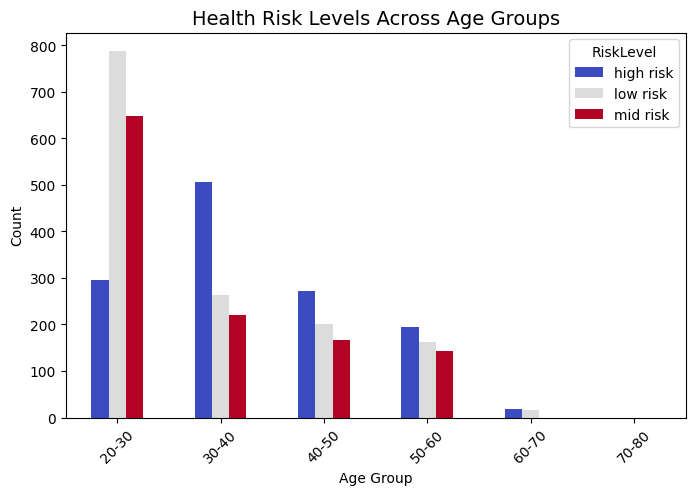

In [31]:
####Since there are no missing values in the dataset no need to clean the data
####We are not checking for duplicate data because the data contains majority of the data in numeric format so it can be repeated

####Age Group vs. Risk Level Count Plot
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

age_risk_counts = df.groupby(['AgeGroup', 'RiskLevel']).size().unstack()

# Plotting using Matplotlib
plt.figure(figsize=(8,5))

age_risk_counts.plot(kind='bar', stacked=False, colormap='coolwarm', ax=plt.gca())

plt.title('Health Risk Levels Across Age Groups', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

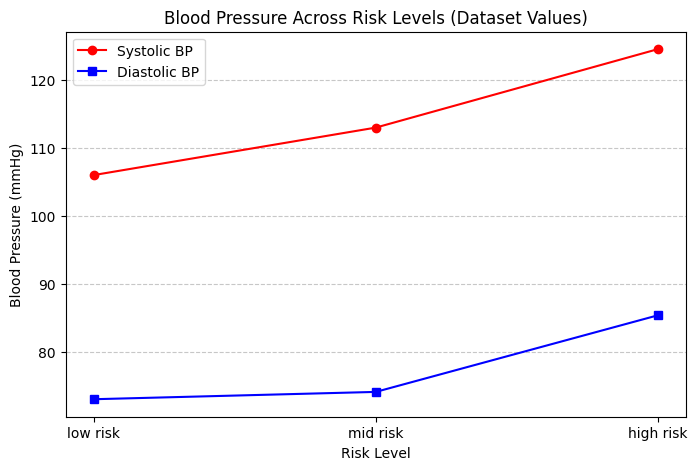

In [29]:
####Systolic and Diastolic BP for each risk level
bp_means = df.groupby("RiskLevel")[["SystolicBP", "DiastolicBP"]].mean().reindex(["low risk", "mid risk", "high risk"])

plt.figure(figsize=(8, 5))
plt.plot(bp_means.index, bp_means["SystolicBP"], marker="o", label="Systolic BP", color="red", linestyle='-')
plt.plot(bp_means.index, bp_means["DiastolicBP"], marker="s", label="Diastolic BP", color="blue", linestyle='-')
plt.xlabel("Risk Level")
plt.ylabel("Blood Pressure (mmHg)")
plt.title("Blood Pressure Across Risk Levels (Dataset Values)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

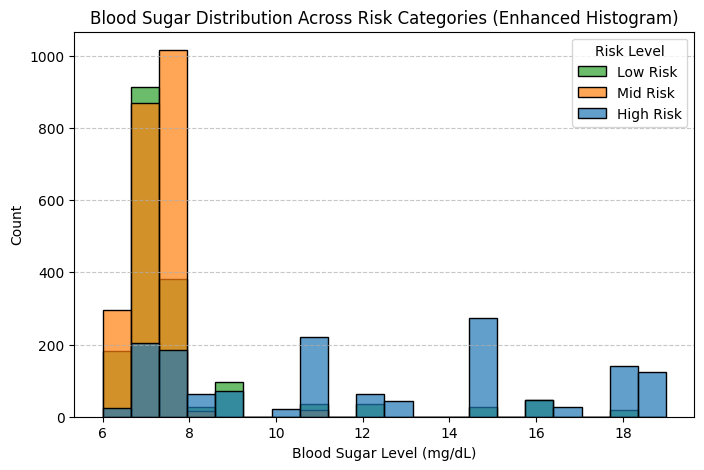

In [24]:
#  Histogram for Blood Sugar Levels Across Risk Categories
plt.figure(figsize=(8, 5))
sns.histplot(df, x="BS", hue="RiskLevel", bins=20, palette=["#1f77b4", "#ff7f0e", "#2ca02c"], alpha=0.7, legend=True)

plt.xlabel("Blood Sugar Level (mg/dL)")
plt.ylabel("Count")
plt.title("Blood Sugar Distribution Across Risk Categories (Enhanced Histogram)")
plt.legend(title="Risk Level", labels=["Low Risk", "Mid Risk", "High Risk"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<ipython-input-25-5e315d793da1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y='HeartRate', palette='coolwarm')


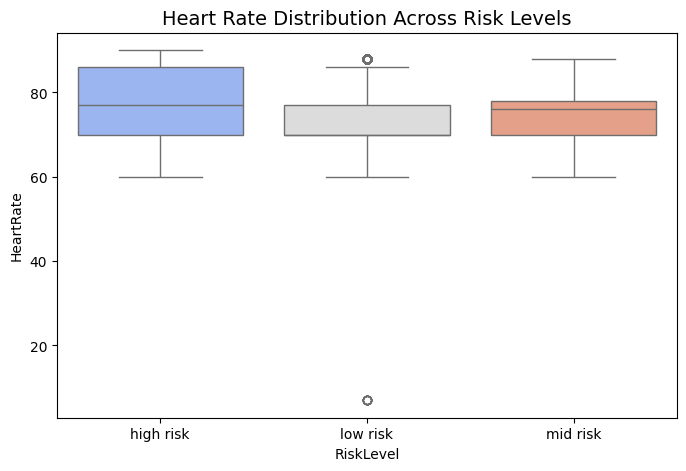

In [25]:
####Heart Rate vs. Risk Level Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='RiskLevel', y='HeartRate', palette='coolwarm')
plt.title('Heart Rate Distribution Across Risk Levels', fontsize=14)
plt.show()



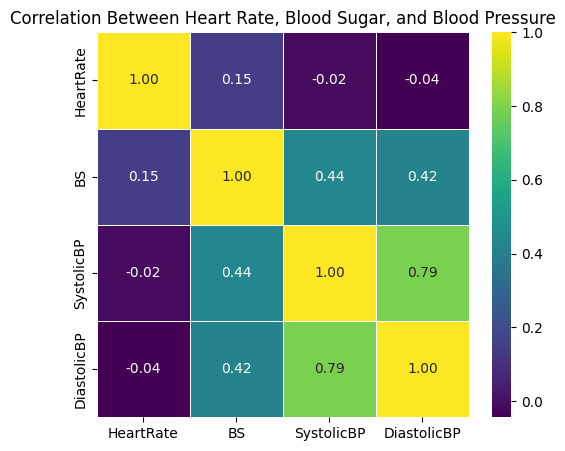

In [26]:
####Correlation matrix for Heart Rate, Blood Sugar, and Blood Pressure
selected_correlation_matrix = df[["HeartRate", "BS", "SystolicBP", "DiastolicBP"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(selected_correlation_matrix, annot=True, cmap="viridis", linewidths=0.5, fmt=".2f")

plt.title("Correlation Between Heart Rate, Blood Sugar, and Blood Pressure")

plt.show()
